# 1 Measures, values and relationships (30pt)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("../data/states.csv.bz2", sep="\t")

## 1. Consider all variables in data. List their measure type (nominal/ordinal/interval/ratio).

In [13]:
data.head()

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area
0,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,365,6315,1.5,69.31,11.3,66.7,152,566432
2,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,21198,5114,1.1,71.71,10.3,62.6,20,156361


Population: Interval

Income: Interval

Illiteracy: Ratio

LifeExp: Interval

Murder: Ratio

HSGrad: Ratio

Frost: Interval

Area: Interval

## 2. Explain their valid value range (continous, integer, continous within certain limits...).

Population: integer with positive values. Within the range of 365 and 21198

Income: integer with positive values. Within the range of 3098 and 6315

Illiteracy: continous with positive values. Within 0.5 and 2.8

LifeExp: continous with positive values. Within 67.96 and 73.6

Murder: continous with positive values. Within 1.4 and 15.1

Frost: integer with positve values. Within 0 and 188

Area: integer with positive values. Within 1,049 and 566,432

## 3. Check if all values are within the range you specified. Are there any invalid values?

In [14]:
data.Population.min()

365

In [15]:
data.Population.max()

21198

In [16]:
data.Income.min()

3098

In [17]:
data.Income.max()

6315

In [18]:
data.Illiteracy.min()

0.5

In [19]:
data.Illiteracy.max()

2.8

In [20]:
data.LifeExp.min()

67.96

In [21]:
data.Murder.min()

1.4

In [22]:
data.Murder.max()

15.1

In [23]:
data.HSGrad.min()

37.8

In [24]:
data.HSGrad.max()

67.3

In [25]:
data.Frost.min()

0

In [26]:
data.Frost.max()

188

In [27]:
data.Area.min()

1049

In [28]:
data.Area.max()

566432

In [29]:
data.LifeExp.min()

67.96

In [30]:
data.LifeExp.max()

73.6

Population: Within the range of 365 and 21198. No invalid values

Income: Within the range of 3098 and 6315. No invalid values

Illiteracy: Within 0.5 and 2.8. No invalid values

LifeExp: Within 67.96 and 73.6. No invalid values

Murder: Within 1.4 and 15.1. No invalid values

Frost: Within 0 and 188. No invalid values

Area: Within 1,049 and 566,432. No invalid values

#### Next, you task is to analyze relationship between HS graduation rate and income using the same state data

## 4. Are these variables of a measure type that permit to ask/answer such a question?

These measure types permit me to ask answer the relationship between the HS graduation rate and the income. This is because all variables are either an interval or a ratio. Specifically, the two variables needed to answer the question are of type interval and ratio. Both of these data types allow for meaningful calculations

## 5. What is your hypothesis: how might these variables be related? What do you think, why might it be like this?

I think the higher the HS graduation rate, the higher the income. This is because most places require at least a Highschool GED as a requirement for a job position. In addition, most high-paying jobs usually require a Bachelor's Degree to apply. To get a Bachelor's you needed to have graduated from high school.

## 6. Make a plot to address your hypothesis. Comment it: does it seem to confirm or not to confirm your thoughts?

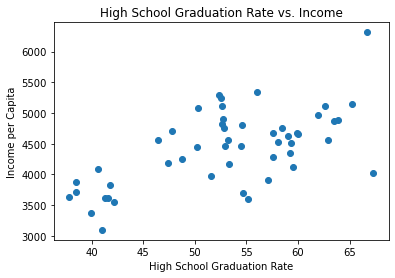

In [31]:
_ = plt.scatter(data.HSGrad, data.Income)
_ = plt.xlabel("High School Graduation Rate")
_ = plt.ylabel("Income per Capita")
_ = plt.title("High School Graduation Rate vs. Income")

There is a positive correlation between high school graduation rate and income. The higher the high school graduation rate, the higher the income per capita. This outcome confirms my prediction.

## 7. Now let’s split the states into two groups: less-educated (HS gradutation rate less than median) and more-educated (HS above median).
Hint: create such a variable and add it to the data frame.

In [32]:
less_educated = data[data.HSGrad < np.median(data.HSGrad)]
more_educated = data[data.HSGrad > np.median(data.HSGrad)]

## 8.  Compute the mean income for both of these state groups. Does the result align well with the plot?
Hint: you can use groupby

In [33]:
less_educated.Income.mean()

4269.88

In [34]:
more_educated.Income.mean()

4601.72

Yes, I would say the results align well with the plot. The average income of the less-educated is less than the average income of the more-educated.

## 9. Based on your analysis, what do you think: do states have higher income because of more education, or the other way around: better income states can afford more education? Explain your reasoning!

Personally, I think that states have higher income because of more education. Many companies require, at the bare minimum, a highschool GED in order to work. Companies that pay more will require their employees at least a Bachelor's degree to work. In addition, its been engraved in our brains that getting a good education equals getting more money.

However, it also makes sense if the higher income states can afford more education. This is because the higher the income, the higher the tax, and a portion of that tax will be funded towards schools.

# 2 Explore Inequality
## 2.1 Descriptive Analysis
### 1. Load all three datasets and do basic sanity checks; remove missings values in the variable of interest—you only need the income (and citations and crater radius) variable below.

In [35]:
lunar = pd.read_csv('../data/lunar-impact-craters_v08-2015-09.csv.bz2', sep='\t')
treatment = pd.read_csv('../data/treatment.csv.bz2', sep='\t')
citations = pd.read_csv('../data/mag-30k-citations.csv.bz2', sep='\t')
lunar.dropna(subset=['7. Radius [m]'])
treatment.dropna(subset=['re78'])
citations.dropna(subset=['citations'])

,id,citations,year
0,1926704088,10,2004
1,1590836146,0,1971
2,2035484488,3,2007
3,1965723909,0,2009
4,2021155615,42,1998
...,...,...,...
29995,1978075524,0,2014
29996,2055200684,1,2008
29997,2080698788,0,2012
29998,2004912114,11,2006


#### a. How many cases do we have in each data file?

In [36]:
treatment.shape[0]

2675

In [37]:
lunar.shape[0]

8716

In [38]:
citations.shape[0]

30000

In the lunar dataset, there is a total of 8,716 rows. In the treatment dataset, there is a total of 2,675 rows. In the citations data set, there is a total of 30,000 rows

#### b. Do the values of interest look reasonable?

In [39]:
lunar['7. Radius [m]'].min()

5

In [40]:
lunar['7. Radius [m]'].max()

1250000

In [41]:
treatment.re78.min()

0.0

In [42]:
treatment.re78.max()

121174.0

In [43]:
citations.citations.min()

0

In [44]:
citations.citations.max()

7241

I think they all look reasonable. They're all positive values

r = lunar["7. Radius [m]"]
### 2. Show the distribution of all three data in a histogram. As the histogram may not look good, do it in two ways: a) histogram of income (or citations, or crater size) and b) histogram of log income. In order to avoid issues with log of zero you can do log(1 + income) instead of log income.

In [156]:
r = lunar["7. Radius [m]"]
i = treatment.re78
c = citations.citations

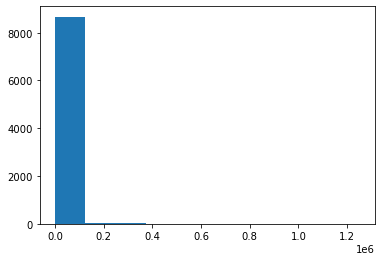

In [157]:
_ = plt.hist(r)

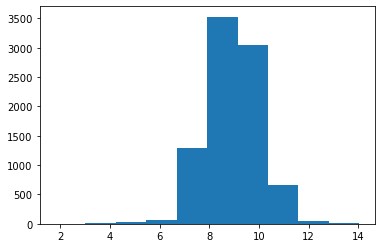

In [158]:
_ = plt.hist(np.log(r + 1))

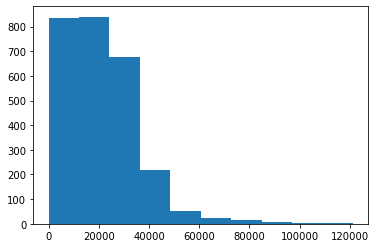

In [159]:
_ = plt.hist(i)

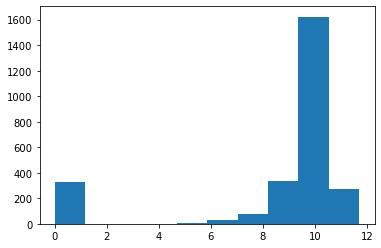

In [160]:
_ = plt.hist(np.log(i + 1))

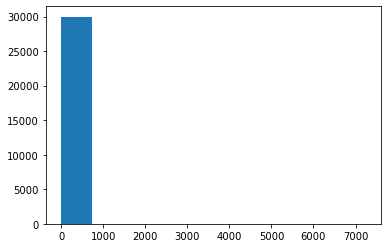

In [161]:
_ = plt.hist(c)

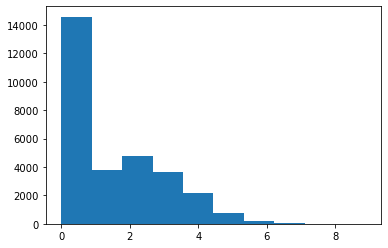

In [155]:
_ = plt.hist(np.log(1 + c))

### 3. Look at the histograms and tell-what do you think, which one describes the least unequal distribution, and which one the most unequal distribution?

The histograms that are logged displays a more equal distribution. To be specific, I think the histogram showing the log() of the lunar radius showed the most equal distribution. I chose this as the least unequal distribution because it showed a more symmetric distribution compared to the others. The one that shows the most unequal distribution is the citations distribution. I chose this as the most unequal one because the highest point of the data set was towards one side of the spread, not in the middle. In other words, it is very asymmetrical.

### 4. Compute sample mean and standard deviation for all three data. Compare these: how much smaller (or larger) is std. dev compared to the mean?
 

In [173]:
r.mean() #lunar mean

13711.492083524552

In [174]:
r.std() #lunar standard deviation

27505.543842011248

In [175]:
i.mean() #treatment mean

20502.37607865417

In [176]:
i.std() #treatment standard deviation

15632.519774212507

In [177]:
c.mean() #citations mean

15.605633333333333

In [178]:
c.std() #citations standard deviation

79.17810312200979

For the lunar radius and the citations, the standard deviations are over two times larger than their means. The treatment mean, on the other hand, is larger than the standard deviation.

## 2.2 80-20 Ratio

### 1. Compute the 20/80 ratio for all these three distributions
Hint: the answers are approximately 18, 30, 37

In [162]:
r_threshold = np.percentile(r , 70)
rtotal = r.sum()
r[r > r_threshold].sum()/rtotal 

0.7073570343211179

In [163]:
i_threshold = np.percentile(i, 64) #top 36%
itotal = i.sum()
i[i > i_threshold].sum()/itotal

0.6348069361388086

In [164]:
c_threshold = np.percentile(c, 82) #top 18%
ctotal = c.sum()
c[c > c_threshold].sum()/ctotal

0.8325220166222027

The top 30% of radius accounts for 70% of all radiuses in the lunar dataset.

The top 36% of real incomes in 1978 account for 63% of all real incomes in 1978 according to the dataset.

The top 18% of citations account for 82% of all citations in the citations dataset.

#### 2. Which distribution is the most unequal one? Which one the most equal one? Does this corresponds to what did you guess based on the visual impression based on the histograms?

The most unequal distribution in the 20/80 distribution is the citations dataset. This corresponds to the visual.

The most equal distribution was the income distribution in the treatment dataset. It would be perfectly equal if the top 50% accounted for 50% of the total data, but it didn't happen with any of the distributions. Instead, the closest one was the top 36% of real incomes accounts for 63% of all real incomes according to the dataset. This is a little different than my visual impressions based on the histogram. My analysis for the histogram was that the lunar data set would be most even. However, it was not the case. 

# 3 Global Temperature Over Time
### Your task is to answer two questions:
#### a) Do we observe a trend in the global temperature over time in this data?
#### b) Do we observe a trend in the temporal variability (i.e. variability over time) of the global temperature in this data?

### 1. Are these variables of such a measure type that permit to ask/answer such a question?

The variables are:

year

month: month 1..12

the area of measurement: globe, nh = north hemisphere, nh_land = NH land, nh_ocean = NH ocean, sh = south hemisphere, trpcs = tropics, noext = northern areas outside tropics, soext, nopol = northern polar areas, etc.

globe: global temperature deg C deviation from 1991-2020 average.

globe_land: global land temperature. There are many others, including hemishperes, ocean, polar areas etc.

Judging by the variables, I think they permit me toask and answer such a question. There is the year and month variable, which are intervals and needed in order to measure time. To measure and find trends about global temperature, the globe and globe_land variables are also numeric and can provide answers to the questions.

### 2. Load the data. Perform basic sanity checks.

In [4]:
temp = pd.read_csv("../data/UAH-lower-troposphere-wide.csv.bz2", sep='\t')

#### How many variables (columns) is there in the data? Ensure you know the variables in the data. Keep the documentation nearby.

In [5]:
temp.shape[1] #gives number of columns

29

#### How many rows of data is there?

In [6]:
temp.shape[0] #gives number of rows

517

#### Print the first few lines of data. Does it look reasonable?

In [7]:
temp.head()

,year,month,globe,globe_land,globe_ocean,nh,nh_land,nh_ocean,sh,sh_land,...,soext_ocean,nopol,nopol_land,nopol_ocean,sopol,sopol_land,sopol_ocean,usa48,usa49,aust
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29
1,1979,1,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92
2,1979,2,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-0.36,-2.00,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30
3,1979,3,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.21,-0.56,-0.47,-0.65,-0.53,-1.25,-0.18,-0.70,-0.38,0.23
4,1979,4,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.31,-0.84,-0.81,-0.87,-0.26,0.26,-0.51,-0.72,-0.46,-1.12


### 3.  Make a simple plot to address the first question–the temperature trend. Which variables do you want to plot? Comment the result: what, if anything, does the figure suggest?
#### Hint: you may want to create a variable for time along the lines time = year +month/12

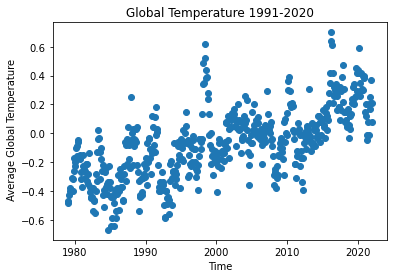

In [8]:
temp["time"] = temp.year + temp.month / 12
_ = plt.scatter(temp.time, temp.globe)
_ = plt.xlabel("Time")
_ = plt.ylabel(" Average Global Temperature")
_ = plt.title("Global Temperature 1991-2020")

I decided to plot a variable that represents time and a vairable that represents the average global temperature. To calculate the time, I used the suggested formula of time = year + month / 12 (I'm assuming the temperature is being taken at the same time every month). The average global temperature was already in the dataset under the variable globe. 

There defintely seems to be an upwards trend. As time passes, the global temperature increase. It is not exactly a linear relationship, as I think that it is slightly curved upwards.

### 4. However, for each month we have a single global temperature reading only so we cannot compute the monthly variance across the globe. Instead, let’s compute yearly variance, variance of global temperature over months for each year, and make a plot where years are on the horizontal axis and temperature variance on the vertical axis.
#### Hint: use groupby by years.

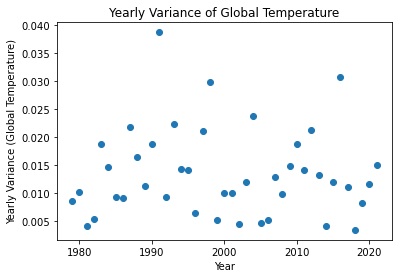

In [22]:
yearly_var = temp.groupby("year").globe.var()
_ = plt.scatter(temp.year.unique(), yearly_var)
_ = plt.xlabel("Year")
_ = plt.ylabel("Yearly Variance (Global Temperature)")
_ = plt.title("Yearly Variance of Global Temperature")

### 5. In order to be consistent, let’s do the same with temperature: compute yearly temperature and repeat the plot with yearly averages. But what is “yearly temperature”? Do you prefer yearly mean temperature? Or perhaps yearly median? Discuss the advantages/disadvantages of these measures and pick an appropriate measure. You may also display both.
#### Hint: Lecture notes Section 1.2.2 “Describing data” discusses mean and median.

In [21]:
mean_temp = temp.groupby("year").globe.mean()
median_temp = temp.groupby("year").globe.median()

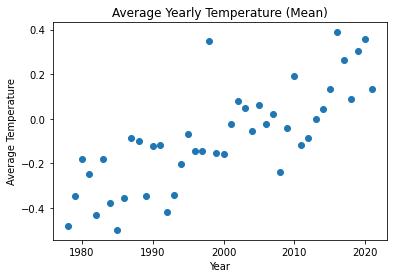

In [53]:
_ = plt.scatter(temp.year.unique(), mean_temp)
_ = plt.xlabel("Year")
_ = plt.ylabel("Average Temperature")
_ = plt.title("Average Yearly Temperature (Mean)")

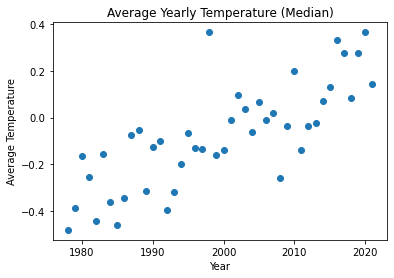

In [54]:
_ = plt.scatter(temp.year.unique(), median_temp)
_ = plt.xlabel("Year")
_ = plt.ylabel("Average Temperature")
_ = plt.title("Average Yearly Temperature (Median)")

Mean is easy to understand, but it sensitive to outliers anc cannot handle missing values. Median, on the other hand, requires the dataset to be organized and picks the middle number. It is not sensitive to outliers, so in a way, it can give a little more accurate reading of the middle number. It can also sometimes handle missings. I think it would be best to display both the graphs of the mean and median data.

### 6. Finally, let’s also make similar plots using decades instead of years.
#### Hint: create a decade variable using year and integer division //.

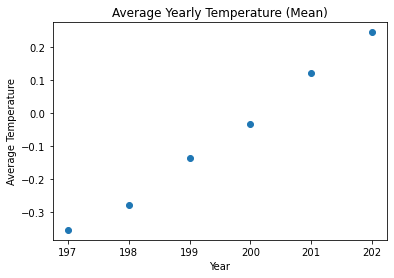

In [55]:
temp["decade"] = temp.year//10
mean_temp_decade = temp.groupby("decade").globe.mean()
median_temp_decade = temp.groupby("decade").globe.median()
_ = plt.scatter(temp.decade.unique(), mean_temp_decade)
_ = plt.xlabel("Year")
_ = plt.ylabel("Average Temperature")
_ = plt.title("Average Yearly Temperature (Mean)")

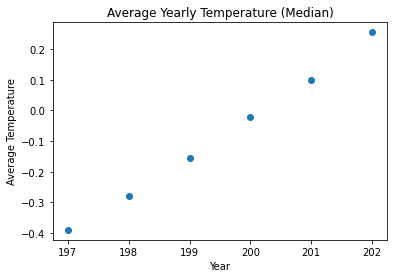

In [56]:
_ = plt.scatter(temp.decade.unique(), median_temp_decade)
_ = plt.xlabel("Year")
_ = plt.ylabel("Average Temperature")
_ = plt.title("Average Yearly Temperature (Median)")

### 7. In your decadal plot: what do you think about data quality for 1970s and 2020s?
#### Hint: how many observations are there?

In [57]:
len(temp[temp.decade == 197])

13

In [58]:
len(temp[temp.decade == 202])

24

The data in the 2020s is far more complete than the data in the 1970s. There are more rows of data in the 2020s than in the 1970s. This means that the quality of data in the 1970s isn't as good as the one in the 2020s.

### 8. Discuss all your plots and state your conclusions: 
#### Do you see any temperature trend? Do you see any trend in temporal variability? 

From the mean and median temperature graphs, there is an obvious positive trend as the year increases. However, I don't see any trends in temporal variability.

#### Which plots do you think illustrate your claims in the best way?

I think the mean and median decadal plots illustrate my claims in the best way. This is because the decadal plots gives a very straightforward answer to the question and is very easy to interpret. Also, the mean and median plots shows the data with and without outliers, which can be very helpful in determining if the temperature is indeed rising, or if it is just one specific year where the temperature just happened to be extremely high.

# How much time did you spend on this PS?

6 hours